In [1]:
import sys
sys.path.append("../../library/")
sys.path.append("../lib/")
import numpy as np
import matplotlib.pyplot as plt
import read_data as rd
from scipy.optimize import minimize_scalar
from sub_plot import *
from defaultPlot import *
from dataProcess import *
from stringFormat import *


# Read Data

In [2]:
time = {}
points = {}
#* ---------------------------------------------------------
orderParameter = {}
meanClusterSize = {}
orderParameterVariance = {}
interEventTime = {}
netOrderParameter = {}
singleOrderParameter = {}
#* ---------------------------------------------------------
orderParameterDist_t = {}
orderParameterDist = {}
clusterSizeDist_op = {}
clusterSizeDist = {}
#* ---------------------------------------------------------
interEventTime_orderParameter = {}

In [40]:
# for networkSize in networkSizeList:
for networkSize in [20000, 160000, 1280000, 10240000]:
    time[networkSize] = np.arange(0.0, 1.0, 1/networkSize)
    # for acceptanceThreshold in acceptanceThresholdList:
    for acceptanceThreshold in [0.5]:
        current = networkSize, acceptanceThreshold
        points[current] = rd.readPoints(networkSize, acceptanceThreshold)
        #* -------------------------------------------------------
        # orderParameter[current] = rd.read("orderParameter", networkSize, acceptanceThreshold)
        # meanClusterSize[current] = rd.read("meanClusterSize", networkSize, acceptanceThreshold)
        # orderParameterVariance[current] = rd.read("orderParameterVariance", networkSize, acceptanceThreshold)
        # interEventTime[current] = rd.read("interEventTime", networkSize, acceptanceThreshold)
        # netOrderParameter[current] = {}
        # for state in ["sub", "super"]:
        #     netOrderParameter[current][state] = rd.read("netOrderParameter", networkSize, acceptanceThreshold, state)
        # singleOrderParameter[current] = rd.read("singleOrderParameter", networkSize, acceptanceThreshold)
        #* ---------------------------------------------------------
        # orderParameterDist_t[current] = rd.extractRepeater("orderParameterDist", networkSize, acceptanceThreshold)
        # for t in orderParameterDist_t[current]:
        #     orderParameterDist[current, t] = rd.read("orderParameterDist", networkSize, acceptanceThreshold, t)
        clusterSizeDist_op[current] = rd.extractRepeater("clusterSizeDist", networkSize, acceptanceThreshold)
        for op in clusterSizeDist_op[current]:
            clusterSizeDist[current, op] = rd.read("clusterSizeDist", networkSize, acceptanceThreshold, op)
        #* ---------------------------------------------------------

# Finding t_a2,m_a2

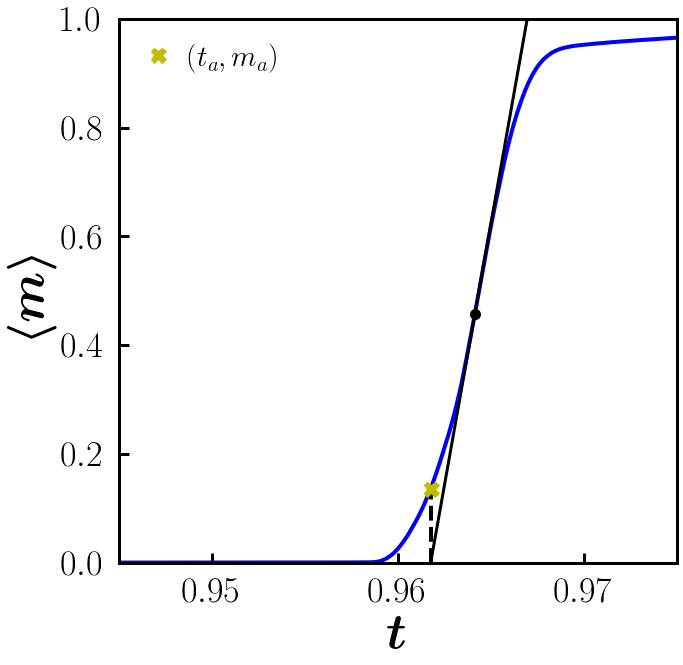

In [76]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 1280000
acceptanceThreshold = 0.4
current = networkSize, acceptanceThreshold

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'b-')
t_a2, m_a2, t_inflection, m_inflection = rd.get_ta_inflection(networkSize, orderParameter[current])
a = m_inflection/(t_inflection-t_a2)
ax.plot([t_a2, t_inflection + (1-m_inflection)/a], [0, 1], 'k-', linewidth=3)
ax.plot(t_inflection, m_inflection, "ko", markersize=10)
ax.plot([t_a2,t_a2], [0, m_a2], 'k--')
ax.plot(t_a2, m_a2, 'yX', label=latex_string("(t_a, m_a)"))

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim([0, 1])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="upper left", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [78]:
points[current]["t_a2"], points[current]["m_a2"], points[current]["t_inflection"], points[current]["m_inflection"] = t_a2, m_a2, t_inflection, m_inflection
print(t_a2,m_a2,t_inflection, m_inflection)
# with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
#     file.write("t_a2: " + str(t_a2) + "\n")
#     file.write("m_a2: " + str(m_a2) + "\n")
#     file.write("t_inflection: " + str(t_inflection) + "\n")
#     file.write("m_inflection: " + str(m_inflection) + "\n")

0.9617756537858768 0.136340835964844 0.9641500000000001 0.45768750046200246


0.828
0.827
0.822
0.817


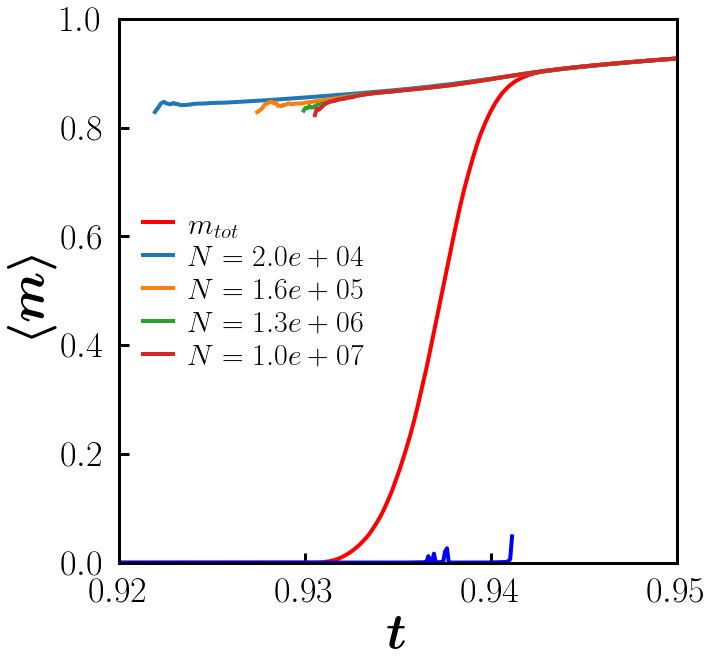

In [109]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
t_c, m_c = points[current]["t_c"], points[current]["m_c"]

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'r-', label=latex_string("m_{tot}"))
net_t, net_op = avgLinBin(*netOrderParameter[current]["sub"], min_val=0, max_val=networkSize - 1, delta=networkSize / 1e4)
ax.plot(net_t / networkSize, net_op, 'b-')
for networkSize in [20000, 160000, 1280000, 10240000]:
    current = networkSize, acceptanceThreshold
    net_t, net_op = avgLinBin(*netOrderParameter[current]["super"], min_val=0, max_val=networkSize - 1, delta=networkSize / 1e4)
    ax.plot(net_t / networkSize, net_op, '-', label=latex_string("N={:.1e}".format(networkSize)))
    print(points[current]["m_c"])

# ax.plot([0, 1], [m_c, m_c], 'g-', linewidth=2)
# ax.plot(t_c, m_c, 'gX', label=latex_string("m_c"))

# for op in singleOrderParameter[current].values():
    # t, op = avgLinBin(time[networkSize], op)
    # ax.plot(t, op, 'o-', color='grey', markersize=5, linewidth=2)

    # ax.plot(time[networkSize][int(chi_plotRange[acceptanceThreshold][0]*networkSize):int(chi_plotRange[acceptanceThreshold][1]*networkSize)], op[int(chi_plotRange[acceptanceThreshold][0]*networkSize): int(chi_plotRange[acceptanceThreshold][1]*networkSize)], 'o-', color='grey', markersize=5, linewidth=2, alpha=0.2)


ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim(0, 1)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="best", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


# Finding t_c, m_c

In [43]:
networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
m_a1, m_a2, m_b, m_c = points[current]["m_a1"], points[current]["m_a2"], points[current]["m_b"], points[current]["m_c"]

print(", ".join('{:.6f}'.format(op) for op in clusterSizeDist_op[current]))
print(m_a1, m_a2, m_b, m_c)


0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, 0.000008, 0.000009, 0.000010, 0.000011, 0.000012, 0.000013, 0.000014, 0.000015, 0.000016, 0.000017, 0.000018, 0.000019, 0.000020, 0.000021, 0.000023, 0.000024, 0.000025, 0.000026, 0.000027, 0.000028, 0.000030, 0.000031, 0.000033, 0.000034, 0.000036, 0.000038, 0.000039, 0.000041, 0.000043, 0.000045, 0.000047, 0.000050, 0.000052, 0.000055, 0.000057, 0.000060, 0.000063, 0.000066, 0.000069, 0.000072, 0.000076, 0.000079, 0.000083, 0.000087, 0.000091, 0.000095, 0.000100, 0.000105, 0.000110, 0.000115, 0.000120, 0.000126, 0.000132, 0.000138, 0.000145, 0.000152, 0.000159, 0.000167, 0.000175, 0.000183, 0.000192, 0.000201, 0.000210, 0.000221, 0.000231, 0.000242, 0.000254, 0.000266, 0.000278, 0.000292, 0.000305, 0.000320, 0.000335, 0.000351, 0.000368, 0.000385, 0.000404, 0.000423, 0.000443, 0.000464, 0.000486, 0.000509, 0.000534, 0.000559, 0.000586, 0.000614, 0.000643, 0.000673, 0.000705, 0.000739, 0.000774, 0.000811, 0.000850, 

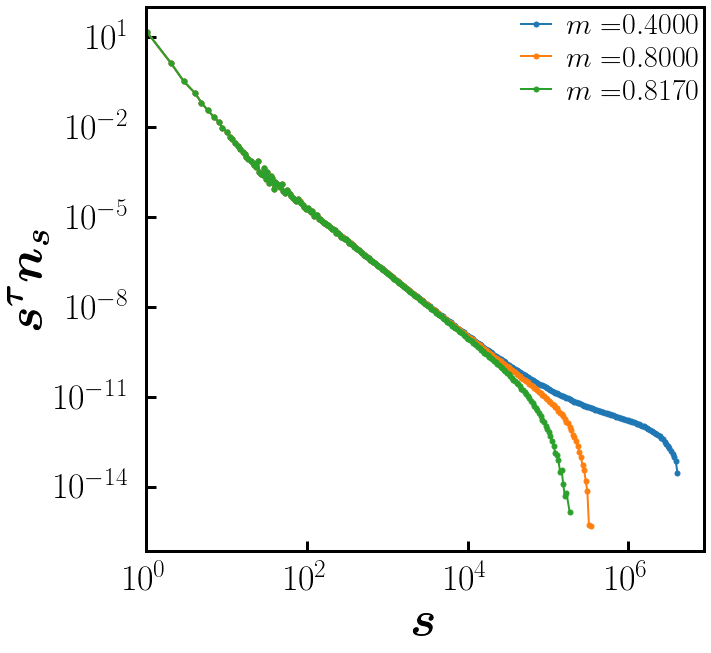

In [45]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

tau = 2.16
def plotCSD_tau(op, label=None, color=None):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.02)
    dist *= np.power(csd, tau)
    label_name = label if label else latex_string("m=") + latex_float(op, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)

# m_c=0.827
# plotCSD_tau(0.003594, latex_string("m_0={:.6f}".format(m_a1)), color='m')
# plotCSD_tau(0.1100, latex_string("m_a={:.4f}".format(m_a2)), color='y')
# plotCSD_tau(0.4400, latex_string("m_b={:.4f}".format(m_b)), color='r')
# plotCSD_tau(m_c, latex_string("m_c={:.4f}".format(m_c)), color='g')


plotCSD_tau(0.4)
plotCSD_tau(0.8)
plotCSD_tau(0.817)

y = 4.35e-1
# ax.plot([1,1e6], [y,y], 'k-', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1)
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("s^\\tau n_s"))
# ax.set_xlim([1, networkSize/20])
# ax.set_ylim([0.3, 0.6])
# ax.set_ylim([0.1, 5])
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

# fig.savefig("../data/mBFW/fig/csd_tau(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


In [96]:
m_c=0.884
points[current]["m_c"] = m_c
points[current]["t_c"] = t_c = rd.op2t(orderParameter[current], m_c)/networkSize
print(t_c, m_c)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_c: " + str(t_c) + "\n")
    file.write("m_c: " + str(m_c) + "\n")

0.967046875 0.884


# Check m_a2

In [99]:
networkSize = 1280000
acceptanceThreshold = 0.4
current = networkSize, acceptanceThreshold
char_size = {}
char_dist = {}
for op in clusterSizeDist_op[current]:
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.07)
    dist *= np.power(csd, tau)
    start, window = 20,4
    try:
        max_index = np.argmax(dist[start:])+start
    except ValueError:
        char_size[op] = 1
        char_dist[op] = 1
        continue
    fit_csd = np.log10(csd[max_index-window : max_index+2])
    fit_dist = np.log10(dist[max_index-window : max_index+2])
    poly = np.poly1d(np.polyfit(fit_csd, fit_dist, 4))
    s_star = minimize_scalar(-poly, bounds=[fit_csd[0], fit_csd[-1]], method='bounded')
    s_star = np.power(10.0, s_star.x)
    char_size[op] = s_star
    char_dist[op] = np.power(10.0, poly(np.log10(s_star)))

print(max(char_dist, key=char_dist.get))
tList = rd.opList2tList(orderParameter[current], clusterSizeDist_op[current])/networkSize


0.05


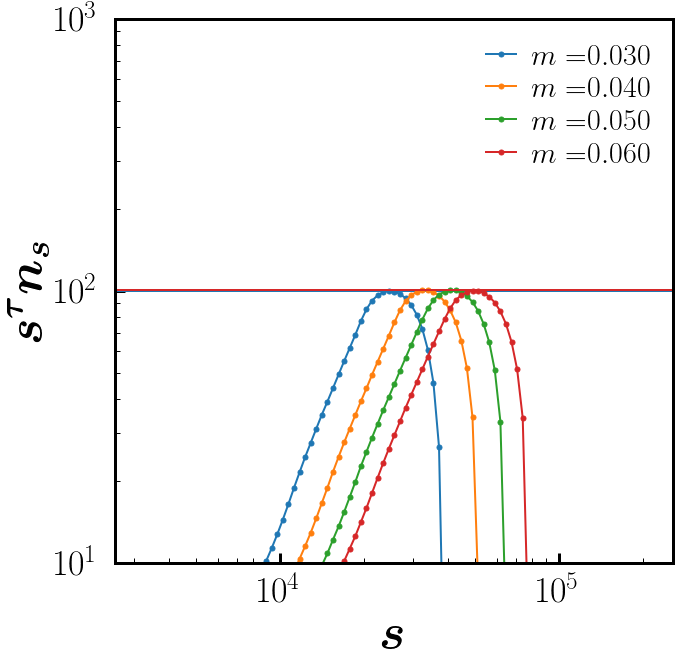

In [100]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

xlim = [networkSize/500, networkSize/5]
def plotCSD_tau(op, label=None, color=None):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.02)
    dist *= np.power(csd, tau)
    label_name = label if label else latex_string("m=") + latex_float(op, 3)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)
    ax.plot(xlim, [char_dist[op], char_dist[op]], '-', color=color_name, linewidth=2)

plotCSD_tau(0.03)
plotCSD_tau(0.04)
plotCSD_tau(0.05)
plotCSD_tau(0.06)
# plotCSD_tau(0.1100, latex_string("m_a={:.4f}".format(m_a2)), color='y')
# plotCSD_tau(0.15, color='purple')

ax.set_xlim([networkSize/500, networkSize/5])
ax.set_ylim(10, 1000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("s^\\tau n_s"))
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/csd_tau(N{:.1e},G{:.1f})_peak.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


# Finding t_b,m_b

In [101]:
networkSize = 1280000
acceptanceThreshold = 0.4
current = networkSize, acceptanceThreshold
char = np.array(list(char_size.values()))
t_b = tList[np.argmax(char)+1]-1e-5
m_b = orderParameter[current][int(t_b*networkSize)]
t_a1, t_a2, m_a1, m_a2, m_c = points[current]["t_a1"], points[current]["t_a2"], points[current]["m_a1"], points[current]["m_a2"], points[current]["m_c"]

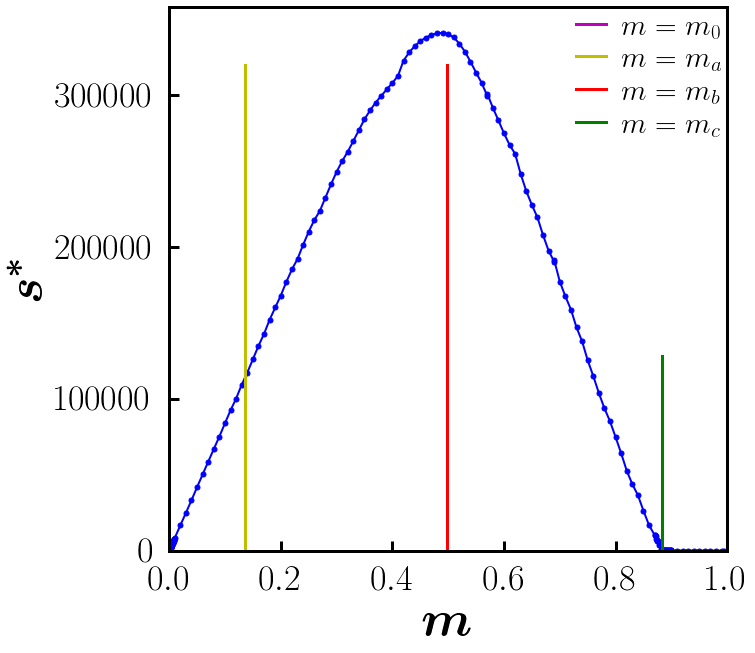

In [102]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

ax.plot(char_size.keys(), char_size.values(), 'bo-', markersize=5, linewidth=2)
ax.plot([m_a1, m_a1], [1, 0.25 * networkSize], 'm-', linewidth=3, label=latex_string("m=m_0"))
ax.plot([m_a2, m_a2], [1, 0.25 * networkSize], 'y-', linewidth=3, label=latex_string("m=m_a"))
ax.plot([m_b, m_b], [1, 0.25 * networkSize], 'r-', linewidth=3, label=latex_string("m=m_b"))
ax.plot([m_c, m_c], [1, 0.1 * networkSize], 'g-', linewidth=3, label=latex_string("m=m_c"))

ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("s^*"))
ax.legend(loc='upper right', borderpad=0.1, borderaxespad=0.1, fontsize=30)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)

# fig.savefig("../data/mBFW/fig/m_char(N{:.1e},G{:.1f}).pdf".format(*current, tau), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)

fig.show()


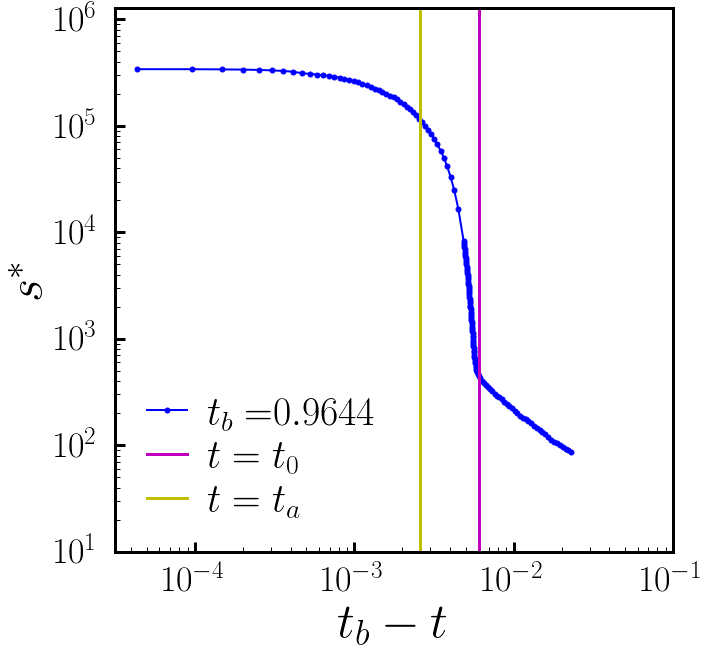

In [103]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotChar(t_b):
    reducedT = t_b-tList
    reducedT, reduced_char = reducedT[reducedT>0], char[reducedT>0]
    ax.plot(reducedT, reduced_char, 'bo-', label=latex_string("t_b=") + latex_float(t_b,4), markersize=5, linewidth=2)

plotChar(t_b)
ax.plot([t_b-t_a1, t_b-t_a1], [10, networkSize], 'm-', label=latex_string("t=t_0"), linewidth=3)
ax.plot([t_b-t_a2, t_b-t_a2], [10, networkSize], 'y-', label=latex_string("t=t_a"), linewidth=3)

ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_string("t_b-t"))
ax.set_ylabel(latex_string("s^*"))
ax.set_ylim(10, networkSize)
ax.set_xlim(right=1e-1)

# fig.savefig("../data/mBFW/fig/reducedT_char(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

In [105]:
points[current]["t_b"], points[current]["m_b"] = t_b, m_b
print(t_b, m_b)
# with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
#     file.write("t_b: " + str(t_b) + "\n")
#     file.write("m_b: " + str(m_b) + "\n")



0.964361875 0.4981949454492186


# Find t_a1, m_a1

In [4]:
networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
print(orderParameterDist_t[current])
t_a1, t_a2, t_b, t_c, m_a2, m_b, m_c = points[current]["t_a1"], points[current]["t_a2"], points[current]["t_b"], points[current]["t_c"], points[current]["m_a2"], points[current]["m_b"], points[current]["m_c"]
print(t_a1, t_a2, t_b, t_c)

[0.9203   0.9204   0.9205   0.9206   0.9207   0.9208   0.9209   0.921
 0.9211   0.9212   0.9213   0.9214   0.9215   0.9216   0.9217   0.9218
 0.9219   0.922    0.9221   0.9222   0.9223   0.9224   0.9225   0.9226
 0.9227   0.9228   0.9229   0.923    0.9231   0.9232   0.9233   0.9234
 0.9235   0.9236   0.9237   0.9238   0.9239   0.924    0.9241   0.9242
 0.9243   0.9244   0.9245   0.9246   0.9247   0.9248   0.9249   0.925
 0.9251   0.9252   0.9253   0.9254   0.9255   0.9256   0.9257   0.9258
 0.9259   0.926    0.9261   0.9262   0.9263   0.9264   0.9265   0.9266
 0.9267   0.9268   0.9269   0.927    0.9271   0.9272   0.9273   0.9274
 0.9275   0.9276   0.9277   0.9278   0.9279   0.928    0.9281   0.9282
 0.9283   0.9284   0.9285   0.9286   0.9287   0.9288   0.9289   0.929
 0.9291   0.9292   0.9293   0.9294   0.9295   0.9296   0.9297   0.9298
 0.9299   0.93     0.9301   0.9302   0.9303   0.9304   0.9305   0.9306
 0.9307   0.9308   0.9309   0.931    0.9311   0.9312   0.9313   0.9314
 0.9315  

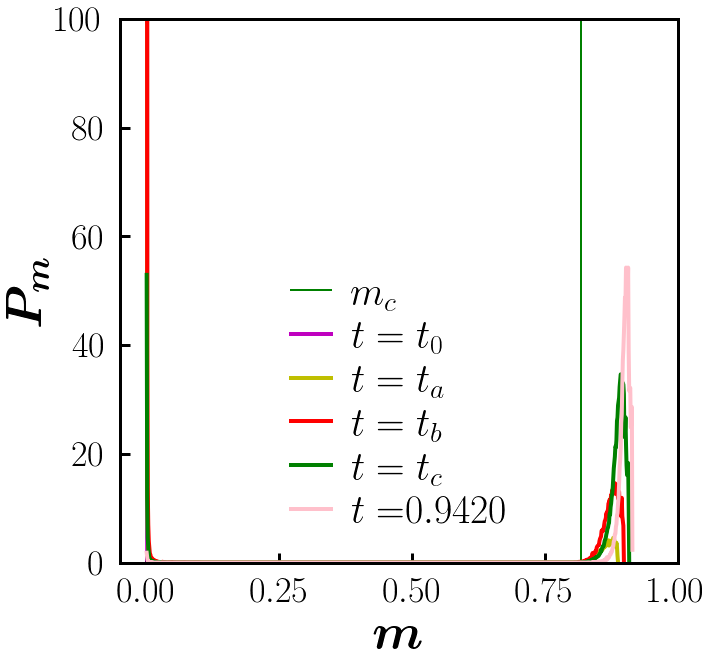

In [6]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotOPD(t, label=None, color=None):
    op, dist = orderParameterDist[current, t]
    op, dist = distLinBin(op/networkSize, dist, delta=1e-3)
    label_name = label if label else latex_string("t=") + latex_float(t, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']

    ax.plot(op, dist, label=label_name, color=color_name)
ax.plot([m_c, m_c], [0, 100], 'g-', label=latex_string("m_c"), linewidth=2)


plotOPD(0.9304, label=latex_string("t=t_0"), color='m')
# plotOPD(0.9289)
plotOPD(0.9345, label=latex_string("t=t_a"), color='y')
plotOPD(0.9370, label=latex_string("t=t_b"), color='r')
plotOPD(0.9398, label=latex_string("t=t_c"), color='g')
plotOPD(0.942, color='pink')

ax.legend(loc="best")
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("P_m"))
ax.set_ylim(0, 100)
ax.set_xlim([-0.05, 1])
# fig.savefig("../data/mBFW/fig/orderParameterDist(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
fig.show()


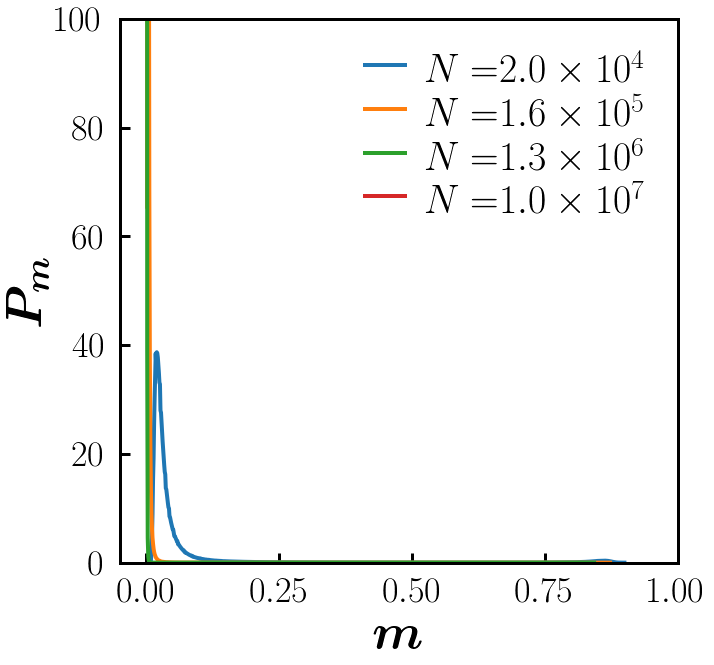

In [10]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotOPD_N(networkSize, label=None, color=None):
    current = networkSize, acceptanceThreshold
    t_c = int(points[current]["t_c"] * 1e3)/1e3
    t_c=0.93
    op, dist = orderParameterDist[current, t_c]
    op, dist = distLinBin(op/networkSize, dist, delta=1e-3)
    label_name = label if label else latex_string("N=") + latex_sci(networkSize, 1)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(op, dist, label=label_name, color=color_name)

# ax.plot([m_c, m_c], [0, 100], 'g-', label=latex_string("m_c"), linewidth=2)
plotOPD_N(20000)
plotOPD_N(160000)
plotOPD_N(1280000)
plotOPD_N(10240000)


ax.legend(loc="best")
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("P_m"))
ax.set_ylim(0, 100)
ax.set_xlim([-0.05, 1])
# fig.savefig("../data/mBFW/fig/orderParameterDist(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
fig.show()


# Check t_a1, m_a1

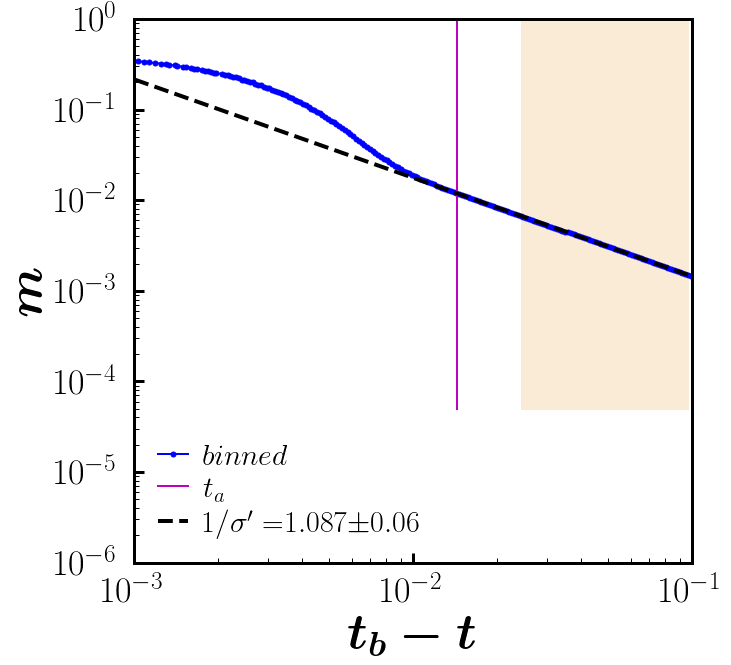

In [65]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
fitRange = np.array([-40, -25])
delta_exponent = 0.01
fitRange *= int(0.04/delta_exponent)

t_a1 = 0.9215
m_a1 = orderParameter[current][int(t_a1*networkSize)]

def plot_reducedT_m(fit=True):
    reducedT = t_b * networkSize - time[networkSize] * networkSize
    reducedT, op = avgLogBin(reducedT[reducedT > 0], orderParameter[current][reducedT > 0], delta_exponent=delta_exponent)
    reducedT /= networkSize
    ax.plot(reducedT, op, 'bo-', label=latex_string("binned"), markersize=5, linewidth=2)
    ax.plot([t_b - t_a1, t_b - t_a1], [1/networkSize, 1], 'm-', label=latex_string("t_a"), linewidth=2)
    if fit:
        fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], op[fitRange[0]:fitRange[1]], offset=0.0, start=1e-3, end=1)
        ax.plot(fitX, fitY, 'k--', label=latex_string("1/\sigma'=") + latex_float(-alpha, 3) + latex_string("\pm 0.06"))
        ax.fill_betweenx([1, 1/networkSize], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')

plot_reducedT_m()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("m"))
ax.set_xlim([1e-3, 1e-1])
ax.set_ylim([1e-6, 1e-0])
ax.legend(loc="best", fontsize=30)

# fig.savefig("../data/mBFW/fig/reducedT_op(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


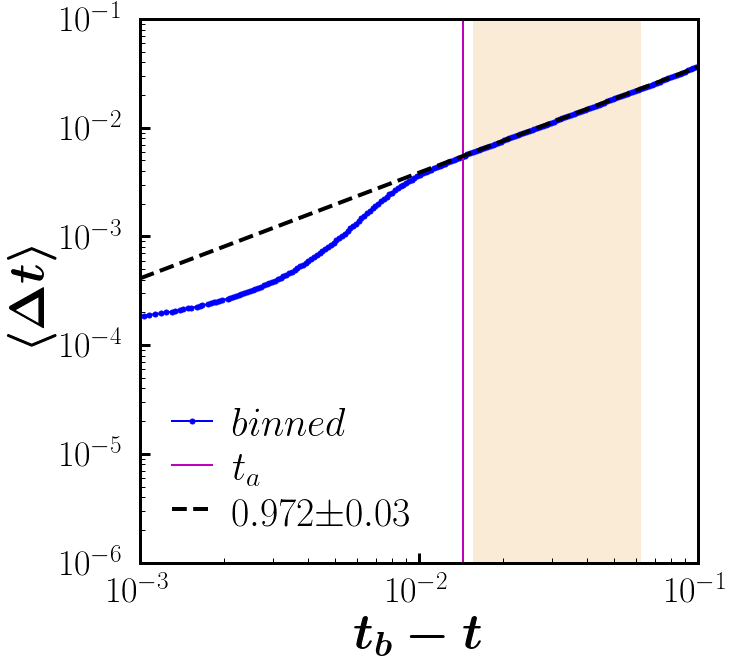

In [66]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
fitRange = np.array([-40,-25])
delta_exponent = 0.01
fitRange *= int(0.04/delta_exponent)

def plot_reducedT_iet(fit=True):
    t, iet = interEventTime[current]
    reducedT = t_b*networkSize-t
    reducedT, iet = avgLogBin(reducedT[reducedT>0], iet[reducedT>0], delta_exponent=delta_exponent)
    reducedT, iet = reducedT/networkSize, iet/networkSize
    ax.plot(reducedT, iet, 'bo-', markersize=5, linewidth=2, label=latex_string("binned"))
    ax.plot([t_b-t_a1, t_b-t_a1], [1e-7, 1e-1], 'm-', linewidth=2, label=latex_string("t_a"))

    if fit:
        fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], iet[fitRange[0]:fitRange[1]], offset=-0.0, start = 1e-3, end=5e-1)
        ax.plot(fitX, fitY, 'k--', label=latex_float(alpha, 3) + latex_string("\pm 0.03"))
        ax.fill_betweenx([1e-7, 1e-1], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')

plot_reducedT_iet()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("\langle \\Delta t \\rangle"))
ax.set_xlim([1e-3, 1e-1])
ax.set_ylim([1e-6, 1e-1])
ax.legend(loc='best')

# fig.savefig("../data/mBFW/fig/reducedT_iet(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


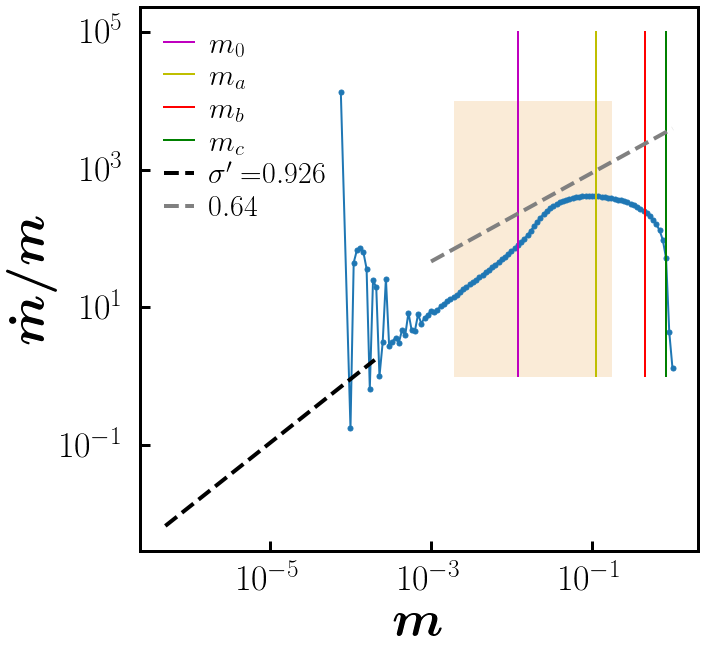

In [67]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotDotOP(fit=True):
    op = orderParameter[current] * networkSize
    dot_op = (op[1:] - op[:-1]) * networkSize
    op = (op[1:] + op[:-1]) / 2.0
    x, y = avgLogBin(op, dot_op / op, delta_exponent=0.04)
    x /= networkSize
    ax.plot(x, y, 'o-', markersize=5, linewidth=2)

    if fit:
        # ax.plot([points["m_a1"], points["m_a1"]], [1,1e5], 'm-', linewidth=2, label=latex_string("m_0"))
        ax.plot([m_a1,m_a1], [1,1e5], 'm-', linewidth=2, label=latex_string("m_0"))
        ax.plot([m_a2,m_a2], [1,1e5], 'y-', linewidth=2, label=latex_string("m_a"))
        ax.plot([m_b, m_b], [1,1e5], 'r-', linewidth=2, label=latex_string("m_b"))
        ax.plot([m_c, m_c], [1,1e5], 'g-', linewidth=2, label=latex_string("m_c"))
        fitRange1 = 33,53
        fitRange2 = -50, -20
        fitX1, fitY1, alpha1, _ = logFit(x[fitRange1[0]:fitRange1[1]], y[fitRange1[0]:fitRange1[1]], offset=0.0, start=5e-7, end=2e-4)
        ax.plot(fitX1, fitY1, 'k--', label=latex_string("\sigma'=") + latex_float(alpha1, 3))
        ax.fill_betweenx([1, 1e4], [x[fitRange1[0]], x[fitRange1[0]]], [x[fitRange1[1]], x[fitRange1[1]]], color='antiquewhite')
        fitX2, fitY2, alpha2, _ = logFit(x[fitRange2[0]:fitRange2[1]], y[fitRange2[0]:fitRange2[1]], offset=-0.3, start=1e-3, end=1)
        ax.plot(fitX2, fitY2, '--', color='grey', label=latex_float(alpha2, 2))
        ax.fill_betweenx([1, 1e4], [x[fitRange2[0]], x[fitRange2[0]]], [x[fitRange2[1]], x[fitRange2[1]]], color='antiquewhite')

plotDotOP()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("\dot{m} / m"))
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/dotOP(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [ ]:
networkSize = 10240000
acceptanceThreshold = 0.2
current = networkSize, acceptanceThreshold
points = rd.readPoints(*current)

reducedT = points["t_g"] * networkSize - time[networkSize] * networkSize
reducedT, op = avgLogBin(reducedT[reducedT > 0], orderParameter[current][reducedT > 0], delta_exponent=0.04)
reducedT /= networkSize
for fit in range(-48, -9):
    _, _, sigma_inverse, _ = logFit(reducedT[-50:fit], op[-50:fit])
    print(-sigma_inverse, end="\t")
print("-----")

op = orderParameter[current] * networkSize
dot_op = (op[1:] - op[:-1]) * networkSize
op = (op[1:] + op[:-1]) / 2.0
x, y = avgLogBin(op, dot_op / op, delta_exponent=0.04)
x /= networkSize
for fit in range(30, 58):
    _, _, sigma, _ = logFit(x[fit: 60], y[fit:60])
    print(sigma, end="\t")

In [69]:
points[current]["t_a1"], points[current]["m_a1"] = t_a1, m_a1
print(t_a1, m_a1)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_a1: " + str(t_a1) + "\n")
    file.write("m_a1: " + str(m_a1) + "\n")

0.9215 0.0119533269886333


In [45]:
print(current)

(160000, 0.5)
